In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [4]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict
import matplotlib.pyplot as plt 
import scienceplots

../data/large_files_for_manuscript/small_h_batch/small_h_model_earth_batch_1247_result.json
json
The evidence is: 585844.8024752407


,omega_gw,phi0_gw,psi_gw,iota_gw,delta_gw,alpha_gw,h,f00,f01,f02,...,distance40,distance41,distance42,distance43,distance44,distance45,distance46,sigma_m,log_likelihood,log_prior
0,3236.449648,1.128481,0.240270,0.187486,0.434403,0.655666,0.101979,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585836.748448,4763.689782
1,9429.896289,0.349060,0.731727,1.095854,0.595871,0.366415,1.176396,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585838.695427,4743.017742
2,504.688822,0.565837,1.937260,0.969483,0.860358,0.581111,1.658115,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585850.231477,4750.415564
3,501.479785,0.739334,2.001407,0.421434,0.858450,0.642846,1.543568,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585853.653421,4741.124682
4,497.072902,0.279464,2.461425,0.413129,0.880403,1.158393,1.549865,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585855.477398,4746.287925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,499.884154,0.088097,2.539659,1.300748,0.889584,1.030311,7.102368,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585875.734741,4753.631141
6593,499.848215,0.012407,2.510736,1.127432,0.896965,1.021829,6.308901,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585875.760834,4735.033233
6594,500.331205,0.162097,2.508193,1.285922,0.894588,1.028836,6.803835,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585875.795671,4748.459831
6595,500.130922,0.133094,2.539880,1.277141,0.911703,1.046449,6.804786,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585875.828045,4752.038985


Number of samples:
6597
Truths/Medians/Variances
$10^{9} \Omega$ 500.0 500.69452537202255 13220.096928047507
$\Phi_0$ 0.2 0.26715636167111023 0.026333916345783356
$\psi$ 2.5 2.4934822122441314 0.015326702244777503
$\iota$ 1.0 0.8108816827736393 0.1154543184629093
$\delta$ 1.0 0.8802991714731537 0.011598745210643368
$\alpha$ 1.0 1.0297384168012245 0.024031463198330483
$10^{15} h_{0}$ 5.0 4.065218696282856 1.2175089469955225
f01 205.53069910059 205.5306990962024 8.703435663281648e-17
fdot1 -4.297e-16 -4.3065063889186957e-16 3.585586569749507e-36
sigma_p1 2.4734206846867384e-20 1.1803479213778668e-20 3.668468131228702e-40
running with increased label size


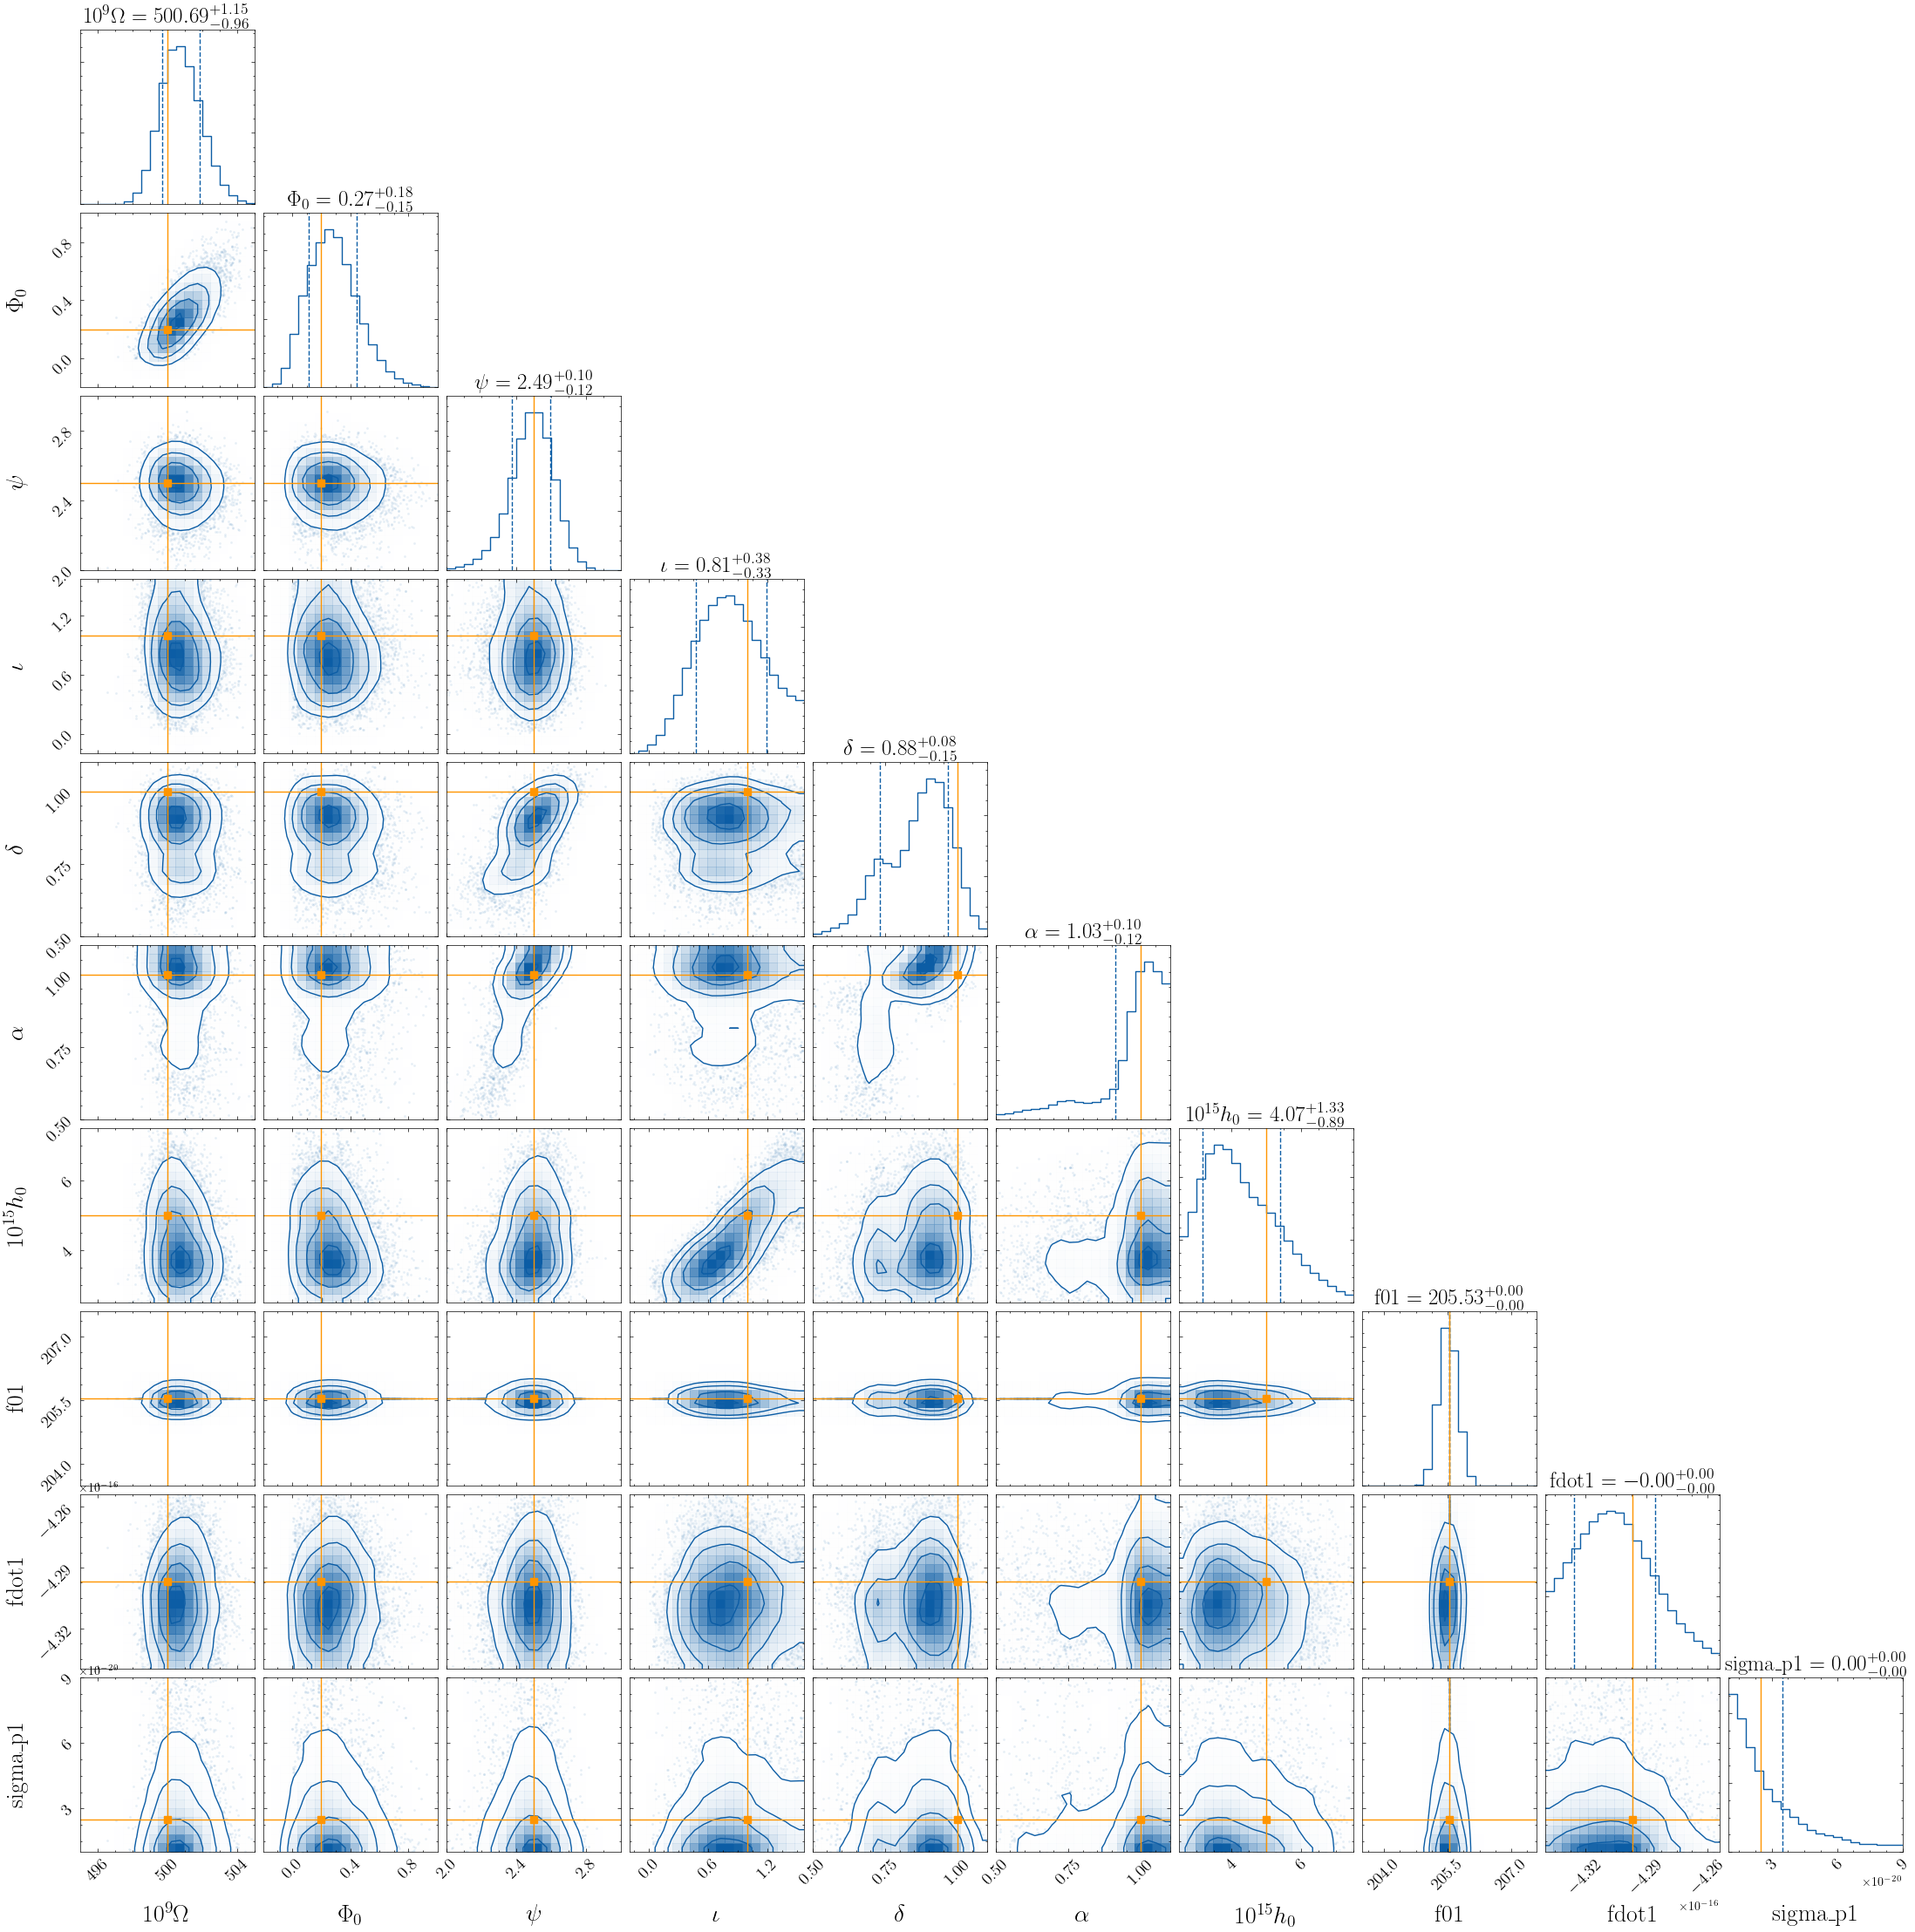

**********************************************************************


In [12]:
import glob
from plotting import plot_custom_corner
import numpy as np
list_of_files = sorted(glob.glob("../data/large_files_for_manuscript/small_h_batch/*"))


idx = 2
path = list_of_files[idx]
print(path)

val = 5e-15

ranges=[(495,505),(-0.20,1.00),(2.0,3.0),(-0.2,np.pi/2.0),(0.5,1.1),(0.5,1.1),(0.5*val*1e15,1.5*val*1e15)]
injection_parameters = [5e-7*1e9,0.20,2.50,1.0,1.0,1.0,val*1e15]


labels = [r'$10^{9} \Omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'$10^{15} h_{0}$'] 
variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]






#injected values
pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
true_f = pulsars["F0"].to_numpy()
true_fdot = pulsars["F1"].to_numpy()
seed=idx+1245
generator = np.random.default_rng(seed)
σp = generator.uniform(low = 1e-21,high=1e-19,size=47)

psr_index = 1
psr_injections = [true_f[psr_index],true_fdot[psr_index],σp[psr_index]]
psr_vars = ["f01", "fdot1", "sigma_p1"]
psr_labs = ["f01", "fdot1", "sigma_p1"]

variables_to_plot += psr_vars
labels += psr_labs
injection_parameters += psr_injections

axes_scales = ''

tol=0.01
ranges += [(true_f[psr_index]-np.abs(true_f[psr_index]*tol),true_f[psr_index]+np.abs(true_f[psr_index]*tol)), (true_fdot[psr_index]-np.abs(true_fdot[psr_index]*tol),true_fdot[psr_index]+np.abs(true_fdot[psr_index]*tol)), (1e-20,9e-20)]



axes_scales = None

#Corner plot of GW parameters
plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=None)